In [3]:
import sys
sys.path.append('..')
from prms_python import Data, Optimizer, Parameters, util
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

params = Parameters('../test/data/models/lbcd/parameters')
data = Data('../test/data/models/lbcd/data')
control = '../test/data/models/lbcd/control'
work_directory = '../test/results/'
measrd = '../test/data/fake_measured_swrad_lbcd.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
optr = Optimizer(params, data, control, work_directory, title='tc') # test custom
util.delete_out_files(work_directory, 'prms.out')

You have no statvar.dat file in your model directory
Running PRMS on original data in ../test/data/models/lbcd for later comparison


In [7]:
stage = 'ddsolrad'
optr.monte_carlo(measrd, ['tmax_index','dday_intcp'], 'swrad_2490', n_sims=8, method='normal', noise_factor=0.2, stage=stage)

['../test/results/tmax_index:59.552076', '../test/results/tmax_index:49.359547', '../test/results/tmax_index:50.591148', '../test/results/tmax_index:50.456126', '../test/results/tmax_index:53.821420', '../test/results/tmax_index:47.635682', '../test/results/tmax_index:52.659216', '../test/results/tmax_index:58.188793']
--------------------------------------------------------------------------------
Output information sent to ../test/results/tc_ddsolrad_opt.json



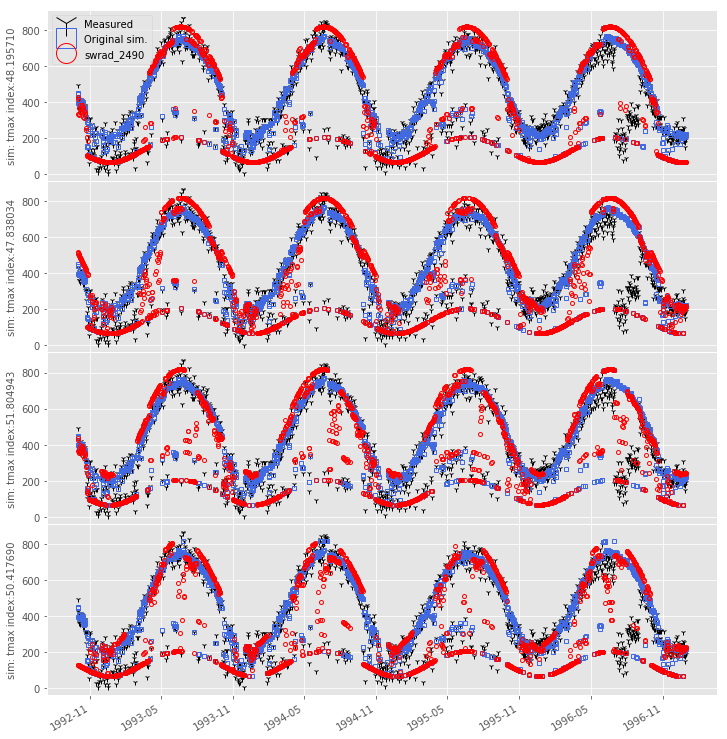

In [8]:
optr.plot_optimization()

In [9]:
from prms_python.optimizer import OptimizationResult

cust_res = OptimizationResult(work_directory, stage='ddsolrad')
cust_res.result_table(freq='monthly',top_n=100)

ddsolrad parameters,NSE,RMSE,PBIAS,COEF_DET
tmax_index:49.359547,0.887990,56.915645,1.553441,0.943311
tmax_index:50.456126,0.739884,86.733649,-6.558124,0.927185
tmax_index:58.188793,0.723641,89.400617,-3.084142,0.879960
tmax_index:53.821420,0.591530,108.688541,-7.356932,0.870244
tmax_index:50.591148,0.549907,114.091973,-7.309278,0.783239
tmax_index:47.635682,0.474886,123.234081,-13.810798,0.766318
tmax_index:59.552076,-0.016496,171.457580,-19.885766,0.540714
tmax_index:52.659216,-0.151783,182.511057,-28.263269,0.634254
